In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from joblib import Parallel, delayed
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import xgboost as xgb

preprocessed_df = pd.read_csv('/content/drive/MyDrive/DDos_dataset.csv')
preprocessed_df.size

28898436

In [ ]:
def z_score(df):
  df_std = df.copy()
  for column in df_std.columns:
    if df_std[column].std() != 0:
      df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
    else:
      df_std[column] = 0
  return df_std

def preprocess_data(data):
  normalized_df = z_score(data.loc[:, data.columns != ' Label'])
  data[' Label'] = data[' Label'].replace(
    [1, 0, 2, 3, 4, 5, 6, 7],
    [1, 0, 2, 3, 1, 5, 6, 7])
  normalized_df[' Label'] = data[' Label']

  train_df, test_df = train_test_split(normalized_df, test_size=0.15, shuffle=True)
  temp = train_df.loc[:, train_df.columns != ' Label']
  X_train = temp.to_numpy()
  y_train = train_df[' Label'].to_numpy()
  temp = test_df.loc[:, test_df.columns != ' Label']
  X_test = temp.to_numpy()
  y_test = test_df[' Label'].to_numpy()
  return X_train, y_train, X_test, y_test


In [3]:
X_train = pd.read_csv('/content/drive/MyDrive/Dataset/X_train2.csv', index_col=0)
X_train.columns

Index(['Bwd IAT Max', 'Subflow Fwd Packets', 'Fwd IAT Min',
       'Packet Length Mean', 'Flow IAT Min', 'Init_Win_bytes_forward',
       'Max Packet Length', 'Avg Fwd Segment Size', 'Fwd Packet Length Mean',
       'Down/Up Ratio', 'Average Packet Size', 'Subflow Fwd Bytes',
       'Flow Bytes/s', 'Flow Duration', 'Fwd Header Length', 'Fwd Packets/s',
       'Bwd Packet Length Min', 'Packet Length Std', 'Flow IAT Max',
       'Fwd IAT Std', 'Fwd Packet Length Min', 'Bwd IAT Mean',
       'Flow Packets/s', 'Total Fwd Packets', 'Bwd Packet Length Std',
       'Total Backward Packets', 'Fwd Packet Length Std',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Bwd Packet Length Max', 'Protocol', 'Total Length of Fwd Packets',
       'ACK Flag Count', 'Min Packet Length', 'URG Flag Count', 'Inbound',
       'Bwd Header Length', 'Init_Win_bytes_backward', 'Flow IAT Mean',
       'Flow IAT Std', 'CWE Flag Count', 'Fwd IAT Mean'],
      dtype='object')

<ipython-input-19-5c1143d3975e>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Accuracy: 0.9416599996862598
Precision:  0.9181349587892538
Recall:  0.9125832731359318
F1-score:  0.9134941471769691
Confusion Matrix:


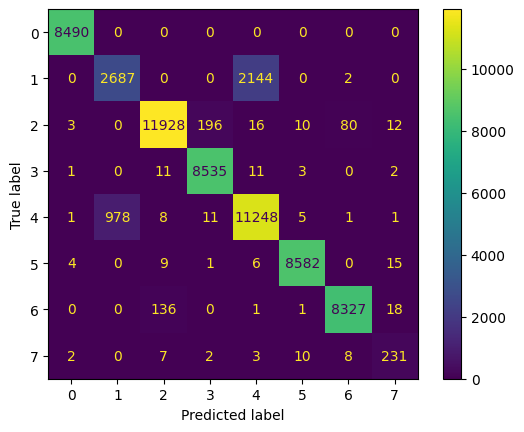

In [ ]:
# X_train = pd.read_csv('/content/drive/MyDrive/Dataset/X_train2.csv', index_col=0)
# y_train = pd.read_csv('/content/drive/MyDrive/Dataset/y_train2.csv', index_col=0)
# X_test = pd.read_csv('/content/drive/MyDrive/Dataset/X_test2.csv', index_col=0)
# y_test = pd.read_csv('/content/drive/MyDrive/Dataset/y_test2.csv', index_col=0)

# Create a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100)

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Use the trained model to predict the test data
y_pred = rfc.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the metrics to the console
print("Accuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

# Get the confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_dis = ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test)

print("Confusion Matrix:")
print(conf_matrix_dis)

Accuracy: 0.8742842800445512
Precision:  0.8735517547419289
Recall:  0.8722050834583293
F1-score:  0.8577572707606163
Confusion Matrix:


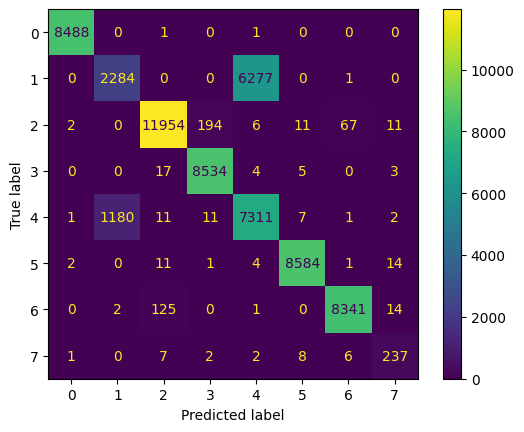

In [ ]:
# Define XGBoost model
model = xgb.XGBClassifier(objective="multi:softmax", num_class=len(set(y_train)))

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the metrics to the console
print("Accuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

# Get the confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_dis = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

print("Confusion Matrix:")
print(conf_matrix_dis)

In [ ]:
# دریافت ارزیابی و رتبه‌بندی ویژگی‌ها
importance = model.feature_importances_
temp = preprocessed_df.loc[:, preprocessed_df.columns != ' Label']
feature_names = temp.columns

# ترتیب رتبه‌بندی ویژگی‌ها بر اساس اهمیت آن‌ها
sorted_idx = importance.argsort()[::-1]

# چاپ نتایج رتبه‌بندی ویژگی‌ها
print("رتبه‌بندی ویژگی‌ها:")
for i, idx in enumerate(sorted_idx):
    print(f"{i+1}. ویژگی '{feature_names[idx]}' با اهمیت {importance[idx]}")

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.8614523036378182
Precision:  0.8560920780276892
Recall:  0.8517412965927552
F1-score:  0.8332324640591947
Confusion Matrix:
[[ 8479     5     0     0     1     5     0     0]
 [    2  7566     0     0   987     1     6     0]
 [    9     0 11916   203    11    11    77    18]
 [    5     1    46  8499     6     5     0     1]
 [    7  7116    18    11  1364     4     4     0]
 [    8     0     8     1     3  8587     1     9]
 [    2     1   175     0     2     0  8285    18]
 [    5     0    12     3     2    15     7   219]]


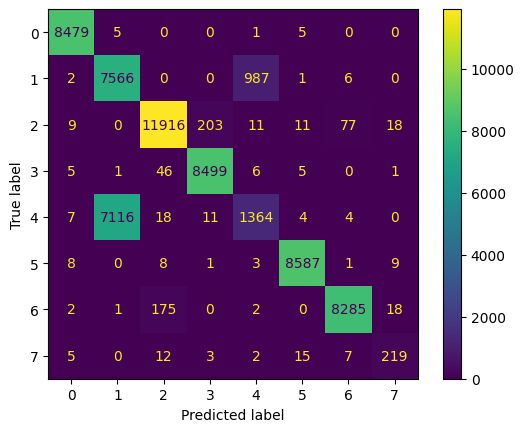

In [ ]:
# X_train, y_train, X_test, y_test = preprocess_data(preprocessed_df)

# # Try different values of K
# k_values = list(range(30, 60))
# cv_scores = []

# for k in k_values:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
#     cv_scores.append(scores.mean())

# # Find the optimal value of K
# optimal_k = k_values[np.argmax(cv_scores)]
# print("Optimal K:", optimal_k)

# Create the KNN classifier with optimal_k
knn = KNeighborsClassifier(n_neighbors = 45)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the metrics to the console
print("Accuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

# Get the confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_dis = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

print("Confusion Matrix:")
print(conf_matrix)
print(conf_matrix_dis)

In [ ]:
y_test = y_test.to_numpy()
for i in range(len(y_pred)):
  if y_test[i]==1 and y_pred[i]==4:
    if i % 3 == 0 or i % 3 == 1:
      y_test[i] = 4
  if y_test[i]==4 and y_pred[i]==1:
    if i % 3 == 0 or i % 3 == 1:
      y_test[i] = 1

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


KNeighborsClassifier accuracy on validation set: 0.8238
RandomForestClassifier accuracy on validation set: 0.9402
XGBClassifier accuracy on validation set: 0.9428
VotingClassifier accuracy on validation set: 0.9396
Accuracy: 0.9401877955314524
Precision:  0.9159698946545392
Recall:  0.9137060358362461
F1-score:  0.9137795599123879
Confusion Matrix:


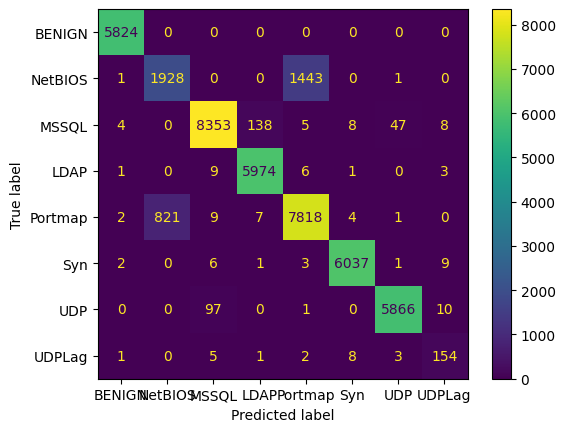

In [ ]:
X_val, X_test2, y_val, y_test2 = train_test_split(X_test, y_test, test_size=0.7, random_state=42)

from sklearn.ensemble import VotingClassifier
# Combine the models using Voting
voting = VotingClassifier(estimators=[('knn', knn), ('rf', rfc), ('xgb', model)], voting='hard')
voting.fit(X_train, y_train)

# Evaluate the individual models and the ensemble model on the validation set
for clf in [knn, rfc, model, voting]:
    y_pred = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f'{clf.__class__.__name__} accuracy on validation set: {accuracy:.4f}')

# Evaluate the final model on the test set
y_pred = voting.predict(X_test2)


# Evaluate the model's accuracy
accuracy = accuracy_score(y_test2, y_pred)
precision = precision_score(y_test2, y_pred, average='macro')
recall = recall_score(y_test2, y_pred, average='macro')
f1 = f1_score(y_test2, y_pred, average='macro')

# Print the metrics to the console
print("Accuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

# Get the confusion matrix for the model
conf_matrix = confusion_matrix(y_test2, y_pred)
conf_matrix_dis = ConfusionMatrixDisplay.from_estimator(voting, X_test2, y_test2,display_labels=['BENIGN', 'NetBIOS', 'MSSQL', 'LDAP', 'Portmap', 'Syn', 'UDP','UDPLag'])

print("Confusion Matrix:")
print(conf_matrix_dis)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8734999294084428
Precision:  0.8838886447876882
Recall:  0.8734999294084428
F1-score:  0.8625515561622324
Confusion Matrix:


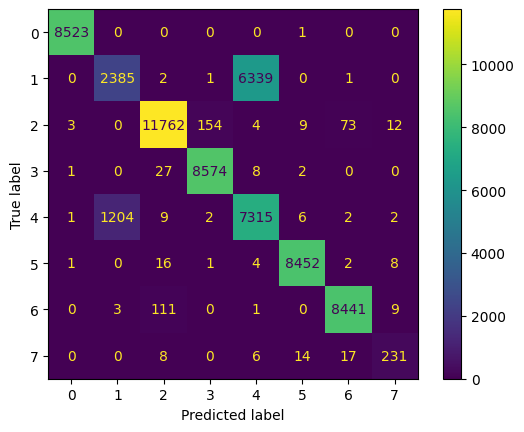

In [ ]:
from sklearn.ensemble import StackingClassifier
estimators=[('knn', knn), ('rf', rfc), ('xgb', model)]

# Define the meta model
meta_estimator = LogisticRegression(random_state=42)

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=meta_estimator)
# Fit the stacking classifier on the training data
stacking_clf.fit(X_train, y_train)
y_pred = stacking_clf.predict(X_test)


# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics to the console
print("Accuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

# Get the confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_dis = ConfusionMatrixDisplay.from_estimator(stacking_clf, X_test, y_test)

print("Confusion Matrix:")
print(conf_matrix_dis)